In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import textwrap

In [2]:
# load data
df = pd.read_csv("../data/RB_assignment_processed.csv", sep=";")

In [3]:
df

,id,question_category,question,person_id,human_answers,ai_answers,human_conclusion,ai_conclusion,conclusion_score,conclusion_reason,human_arguments,ai_arguments,argument_precision,argument_recall,argument_f1
0,1,shopping behavior,where do you typically purchase your personal ...,c_human,"i usually buy my products online, as this give...",i typically purchase my personal care products...,usually online but sometimes at stores.,I typically purchase my personal care products...,0.8,Both outputs indicate purchases from online ch...,"['Buying online gives the most flexibility', '...",['Stores that offer a wide range of essentials...,0.250000,0.333333,0.285714
1,2,shopping behavior,where do you typically purchase your personal ...,s_human,i usually order my face products online from y...,i typically purchase my personal care products...,Usually order face products online from YesSty...,From online stores like YesStyle and Soko Glam.,0.5,Partial match: both conclude purchasing from Y...,['yesstyle page that has the korean skin produ...,['They offer a wide range of Korean skincare b...,0.250000,1.000000,0.400000
2,3,shopping behavior,where do you typically purchase your personal ...,g_human,i almost always get all my personal care produ...,i typically purchase my personal care products...,Almost always at my nearest full-service super...,Typically from the supermarket.,1.0,Evaluation Step 1 extracted the conclusions: A...,['I wait to buy personal care products until t...,"[""It's convenient"", 'I can easily find the bra...",0.333333,1.000000,0.500000
3,4,product preferences,which personal care brands do you buy most oft...,c_human,i don't really know the brands. i buy them bec...,i usually stick with brands that offer simple ...,I don't know the brands I buy most often.,"I usually buy simple, effective, affordable sk...",0.0,The Actual conclusion says the speaker buys si...,"[""I don't really know the brands."", 'I buy the...",['I usually stick with brands that offer simpl...,0.500000,0.666667,0.571429
4,5,product preferences,which personal care brands do you buy most oft...,s_human,for my face i mostly use korean products like ...,i mostly buy skincare products from korean bra...,"Mostly Korean brands: Some By Mi, Axis-Y, and ...",I mostly buy Korean skincare brands such as So...,1.0,Both final conclusions state 'Mostly Korean br...,[],"[""'Some By Mi' AHA/BHA/PHA toner works well fo...",0.000000,1.000000,0.000000
5,6,product preferences,which personal care brands do you buy most oft...,g_human,i'm actually not 100%% confident of the brandi...,i usually buy nivea for skincare and body wash...,Current body lotion is likely Nivea; previous ...,"Usually Nivea, sometimes no-name brands.",1.0,Label: same. Actual conclusion — usually Nivea...,"[""i'm actually not 100% confident of the brand...","['They are reliable.', 'They have been effecti...",0.250000,0.333333,0.285714
6,7,product preferences,what is the ideal size and packaging for a bod...,c_human,"it should be around 300 ml, use natural materi...",i prefer a body wash size of around 250-500 ml...,"Approximately 300 ml, made with natural materi...",Around 250–500 ml in recyclable or biodegradab...,0.4,Partial match: both specify similar volume (30...,"['use natural materias', 'smell nice', 'needs ...",['Prefer a body wash size of around 250-500 ml...,0.250000,0.000000,0.000000
7,8,product preferences,what is the ideal size and packaging for a bod...,s_human,"for body wash, i would go with a big size as i...","for a body wash, i prefer a 250-300 ml glass b...","Large size in a transparent, minimalistic glas...","A 250–300 ml glass bottle with a pump, clean a...",0.8,Following steps 1–4: extracted conclusions (Ac...,['A big size is preferred because it is more e...,"['A pump dispenser provides ease of use.', 'Pa...",0.400000,0.500000,0.444444
8,9,product preferences,what is the ideal size and packaging for a bod...,g_human,"for home use, i prefer medium-large sized meta...",i prefer a b

In [4]:
numerical_cols = ['conclusion_score', 'argument_precision', 'argument_recall', 'argument_f1']

In [5]:
# Group by person_id and calculate the mean
person_scores = df.groupby('person_id')[numerical_cols].mean().reset_index()

print("\nAverage scores by person:")
print(person_scores)


Average scores by person:
  person_id  conclusion_score  argument_precision  argument_recall  \
0   c_human              0.53            0.257143         0.558333   
1   g_human              0.46            0.195000         0.400000   
2   s_human              0.41            0.169167         0.400000   

   argument_f1  
0     0.291775  
1     0.236294  
2     0.180404  


In [6]:
# Group by question and calculate the mean
question_scores = df.groupby('question')[numerical_cols].mean().reset_index()

# Sort the results by conclusion_score descending for better readability
question_scores = question_scores.sort_values(by='conclusion_score', ascending=False)
print("\nAverage scores by question:")
print(question_scores)


Average scores by question:
                                            question  conclusion_score  \
7  where do you typically purchase your personal ...          0.766667   
1  How likely are you to repurchase your preferre...          0.733333   
0  How do you discover new personal care products...          0.666667   
8  which personal care brands do you buy most oft...          0.666667   
6  what is the ideal size and packaging for a bod...          0.566667   
2  Which out of the following type of body lotion...          0.500000   
5  if you would create the perfect body wash for ...          0.466667   
3  how long have you been using your current bran...          0.200000   
4  if you could choose one celebrity to represent...          0.100000   
9  which personal care products, if any, do you r...          0.000000   

   argument_precision  argument_recall  argument_f1  
7            0.277778         0.777778     0.395238  
1            0.250000         0.333333     0.222

In [7]:
# Group by question_category and calculate the mean
category_scores = df.groupby('question_category')[numerical_cols].mean().reset_index()

print("\nAverage scores by question category:")
print(category_scores)


Average scores by question category:
     question_category  conclusion_score  argument_precision  argument_recall  \
0        brand loyalty          0.733333            0.250000         0.333333   
1           influences          0.100000            0.000000         0.083333   
2  product preferences          0.480000            0.251111         0.522222   
3    shopping behavior          0.477778            0.188492         0.500000   

   argument_f1  
0     0.222222  
1     0.000000  
2     0.273402  
3     0.257447  


In [ ]:
plt.figure(facecolor='white')

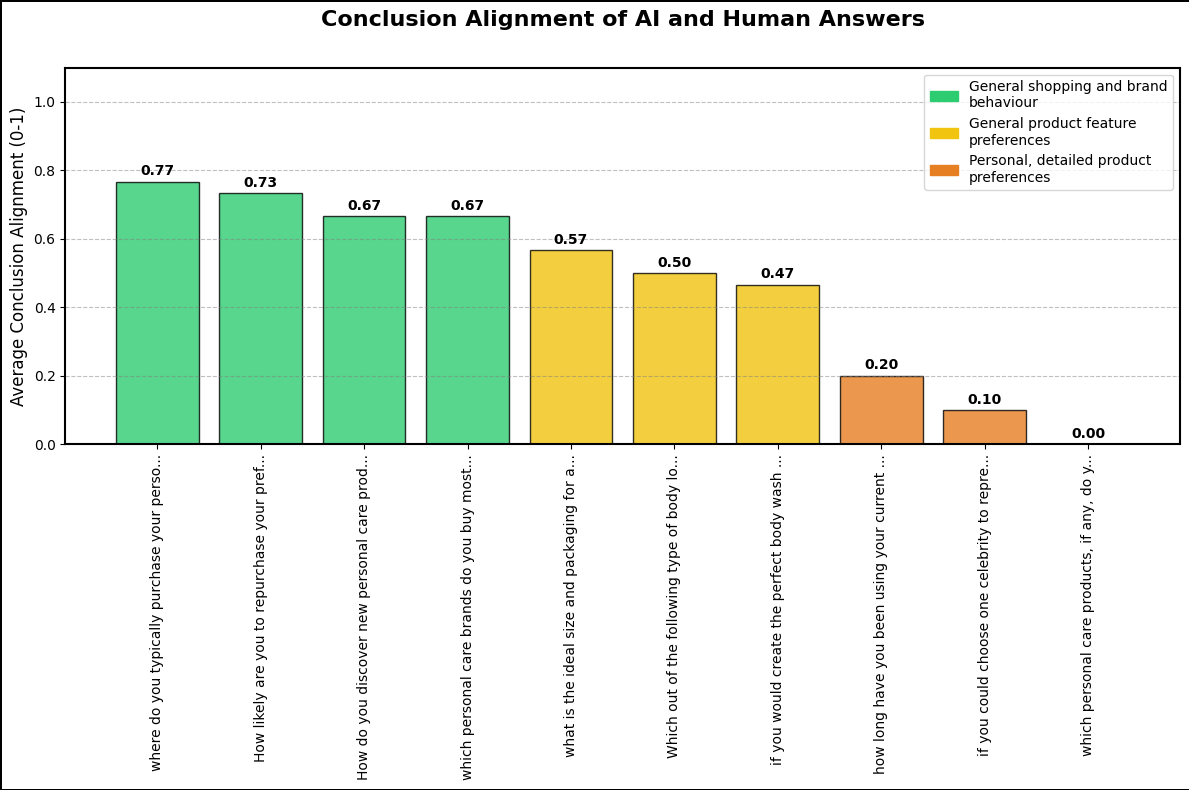

                            renamed_group  conclusion_score
0    General shopping and brand behaviour          0.708333
1     General product feature preferences          0.511111
2  Personal, detailed prodzct perferences               NaN


In [37]:
# Calculate mean conclusion score per question and sort descending
question_data = df.groupby('question')['conclusion_score'].mean().sort_values(ascending=False).reset_index()


# Define the new names as requested by the user
def assign_renamed_group(index):
    if index < 4:
        return "General shopping and brand behaviour"
    elif index < 7:
        return "General product feature preferences"
    else:
        return "Personal, detailed product preferences"


question_data['renamed_group'] = [assign_renamed_group(i) for i in range(len(question_data))]

# Color mapping for the groups
group_colors = {
    "General shopping and brand behaviour": "#2ecc71",  # Green
    "General product feature preferences": "#f1c40f",  # Yellow
    "Personal, detailed product preferences": "#e67e22"  # Orange
}

question_data['color'] = question_data['renamed_group'].map(group_colors)


# Abbreviate questions
def abbreviate_question(q, max_length=45):
    if len(q) > max_length:
        return q[:max_length - 3] + "..."
    return q


question_data['short_question'] = question_data['question'].apply(abbreviate_question)

# Ensure white background (notebook display + saved figure)
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['savefig.facecolor'] = 'white'
plt.rcParams['savefig.transparent'] = False

# Ensure all text is black
plt.rcParams['text.color'] = 'black'
plt.rcParams['axes.labelcolor'] = 'black'
plt.rcParams['axes.titlecolor'] = 'black'
plt.rcParams['xtick.color'] = 'black'
plt.rcParams['ytick.color'] = 'black'

# Ensure figure border is black (display + saved figure)
plt.rcParams['figure.edgecolor'] = 'black'
plt.rcParams['figure.frameon'] = True
plt.rcParams['savefig.edgecolor'] = 'black'

# Create the plot
fig, ax = plt.subplots(figsize=(12, 8), facecolor='white')
fig.patch.set_facecolor('white')
fig.patch.set_alpha(1.0)
fig.patch.set_edgecolor('black')
fig.patch.set_linewidth(2.0)
ax.set_facecolor('white')

# Make axes border (spines) black
for spine in ax.spines.values():
    spine.set_color('black')
    spine.set_linewidth(1.5)

bars = plt.bar(
    question_data['short_question'],
    question_data['conclusion_score'],
    color=question_data['color'],
    edgecolor='black',
    alpha=0.8
)

# Add score labels on top
for bar in bars:
    yval = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        yval + 0.01,
        f"{yval:.2f}",
        ha='center',
        va='bottom',
        fontsize=10,
        fontweight='bold',
        color='black'
    )

# Formatting
plt.title('Conclusion Alignment of AI and Human Answers', fontsize=16, fontweight='bold', pad=30, color='black')
plt.ylabel('Average Conclusion Alignment (0-1)', fontsize=12, color='black')
plt.ylim(0, 1.1)
plt.xticks(rotation=90, ha='center', fontsize=10, color='black')
plt.yticks(color='black')
plt.grid(axis='y', linestyle='--', color='grey', alpha=0.5)

# Legend
legend_elements = [plt.Rectangle((0, 0), 1, 1, color=color, label=textwrap.fill(group, 30))
                   for group, color in group_colors.items()]
plt.legend(handles=legend_elements, loc='upper right', labelcolor='black')

plt.tight_layout()
plt.savefig('figures/conclusion_alignment.pdf', facecolor='white', edgecolor='black', bbox_inches='tight',
            transparent=False)
plt.show()
plt.close()

# Calculate averages for summary
final_summary = question_data.groupby('renamed_group')['conclusion_score'].mean().reindex([
    "General shopping and brand behaviour",
    "General product feature preferences",
    "Personal, detailed prodzct perferences"
]).reset_index()

print(final_summary)


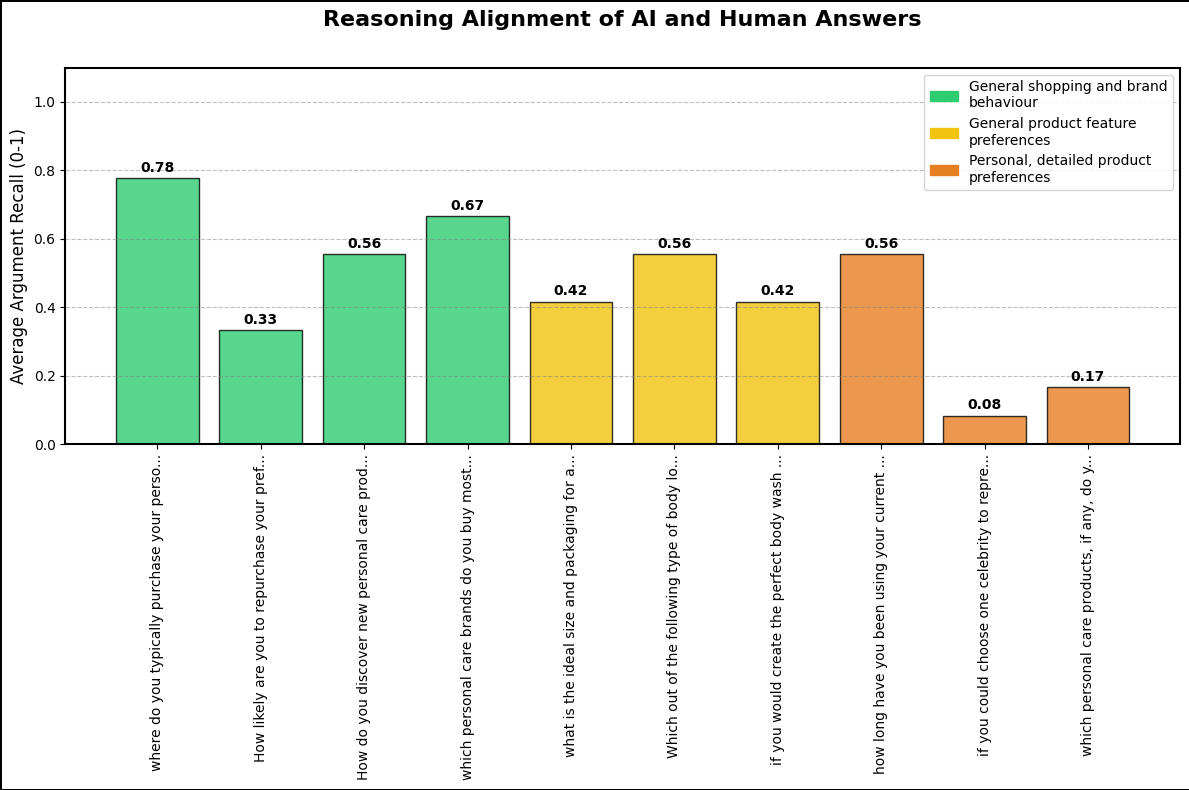

                          renamed_group  argument_recall
0  General shopping and brand behaviour         0.583333
1           Product feature preferences              NaN
2          Personal product preferences              NaN


In [38]:
# Calculate mean scores per question
# We need conclusion_score to maintain the same sort order as before
# and argument_recall to plot the values
question_data = df.groupby('question')[['conclusion_score', 'argument_recall']].mean().sort_values(
    by='conclusion_score', ascending=False).reset_index()


# Define the names and groups as requested
def assign_renamed_group(index):
    if index < 4:
        return "General shopping and brand behaviour"
    elif index < 7:
        return "General product feature preferences"
    else:
        return "Personal, detailed product preferences"


question_data['renamed_group'] = [assign_renamed_group(i) for i in range(len(question_data))]

# Color mapping for the groups
group_colors = {
    "General shopping and brand behaviour": "#2ecc71",  # Green
    "General product feature preferences": "#f1c40f",  # Yellow
    "Personal, detailed product preferences": "#e67e22"  # Orange
}

question_data['color'] = question_data['renamed_group'].map(group_colors)


# Abbreviate questions
def abbreviate_question(q, max_length=45):
    if len(q) > max_length:
        return q[:max_length - 3] + "..."
    return q


question_data['short_question'] = question_data['question'].apply(abbreviate_question)

# Ensure white background (notebook display + saved figure)
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['savefig.facecolor'] = 'white'
plt.rcParams['savefig.transparent'] = False

# Ensure all text is black
plt.rcParams['text.color'] = 'black'
plt.rcParams['axes.labelcolor'] = 'black'
plt.rcParams['axes.titlecolor'] = 'black'
plt.rcParams['xtick.color'] = 'black'
plt.rcParams['ytick.color'] = 'black'

# Ensure figure border is black (display + saved figure)
plt.rcParams['figure.edgecolor'] = 'black'
plt.rcParams['figure.frameon'] = True
plt.rcParams['savefig.edgecolor'] = 'black'

# Create the plot
fig, ax = plt.subplots(figsize=(12, 8), facecolor='white')
fig.patch.set_facecolor('white')
fig.patch.set_alpha(1.0)
fig.patch.set_edgecolor('black')
fig.patch.set_linewidth(2.0)
ax.set_facecolor('white')

# Make axes border (spines) black
for spine in ax.spines.values():
    spine.set_color('black')
    spine.set_linewidth(1.5)

# Plotting argument_recall but in the order determined by conclusion_score
bars = plt.bar(question_data['short_question'], question_data['argument_recall'],
               color=question_data['color'], edgecolor='black', alpha=0.8)

# Add score labels on top
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.01, f"{yval:.2f}",
             ha='center', va='bottom', fontsize=10, fontweight='bold', color='black')

# Formatting
plt.title('Reasoning Alignment of AI and Human Answers', fontsize=16, fontweight='bold', pad=30, color='black')
plt.ylabel('Average Argument Recall (0-1)', fontsize=12, color='black')
plt.ylim(0, 1.1)
plt.xticks(rotation=90, ha='center', fontsize=10, color='black')
plt.yticks(color='black')
plt.grid(axis='y', linestyle='--', color='grey', alpha=0.5)

# Legend
legend_elements = [plt.Rectangle((0, 0), 1, 1, color=color, label=textwrap.fill(group, 30))
                   for group, color in group_colors.items()]
plt.legend(handles=legend_elements, loc='upper right', labelcolor='black')

plt.tight_layout()
plt.savefig('figures/argument_recall.pdf', facecolor='white', edgecolor='black', bbox_inches='tight', transparent=False)
plt.show()

# Calculate averages for summary based on argument_recall
final_summary = question_data.groupby('renamed_group')['argument_recall'].mean().reindex([
    "General shopping and brand behaviour",
    "Product feature preferences",
    "Personal product preferences"
]).reset_index()

print(final_summary)